In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:


d1 = pd.read_excel('population.xls')
d2 = pd.read_excel('restaurant.xls')
d3 = pd.read_excel('stores.xls')
d4 = pd.read_excel('tax.xls')

# Final Data Wrangling - Merging Clean Datasets

In [ ]:
result = pd.concat([d1, d4], axis=1, join_axes=[d1.index])

In [ ]:
result.head()

In [ ]:
result2 = pd.concat([d2, d3], axis=1, join_axes=[d2.index])

In [ ]:
result2.head()

In [ ]:
final = pd.concat([result, result2], axis=1, join_axes=[result.index])

In [ ]:
final.head()

In [ ]:
final.to_excel('final.xls', index=False)

# Modeling Starts Here

In [41]:
test=pd.read_excel('final.xls', index_col=0, na_values=['(NA)']).fillna(0)


In [42]:
test.dtypes

County                                        object
2010 Census Population                        object
Population Estimate, 2014                     object
Food & Retail Tax 2014                       float64
Fast Food 2009                                 int64
Fast Food 2014                                 int64
Fast Food % Change 09-14                     float64
Full Service 2009                              int64
Full Service 2014                              int64
Full Service % Change 09-14                  float64
Grocery Store 09                               int64
Grocery Store 2014                             int64
Grocery Store % Change 09-14                 float64
Supercenters & Club Stores 2009                int64
Supercenters & Club Stores 2014                int64
Supercenters & Club Stores % Change 09-14    float64
Convenience Stores 2009                        int64
Convenience Stores 2014                        int64
Convenience Stores % Change 09-14            f

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['Fast Food 2009']
feature_cols2 = ['Grocery Store 09']
X = test[feature_cols]
y = test[feature_cols2]
logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

C:\Users\kdsing2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
test.shape

(3142, 23)

In [30]:
assorted_pred_class

array([ 5, 10,  4, ...,  3,  3,  2], dtype=int64)

In [31]:
test['assorted_pred_class'] = assorted_pred_class

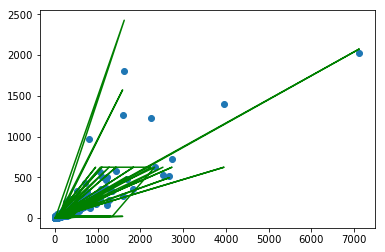

In [38]:
plt.scatter(test[feature_cols], test[feature_cols2])
plt.plot(test[feature_cols], test.assorted_pred_class, color='green');

In [20]:
logreg.predict_proba(X)

C:\Users\kdsing2\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([[  4.25078732e-20,   9.07810507e-09,   6.93630356e-06, ...,
          2.93919125e-04,   2.07014549e-04,   3.95803338e-09],
       [  4.67470767e-74,   9.14353349e-31,   3.41903251e-19, ...,
          4.93814932e-04,   3.52049991e-04,   8.17459794e-09],
       [  3.27500931e-14,   2.17135861e-06,   1.84530230e-04, ...,
          2.55823800e-04,   1.79943381e-04,   3.36785122e-09],
       ..., 
       [  7.97208736e-17,   1.91516202e-07,   4.31987183e-05, ...,
          2.73794632e-04,   1.92697815e-04,   3.64091097e-09],
       [  2.64927710e-10,   8.05282381e-05,   1.58120377e-03, ...,
          2.24475569e-04,   1.57753359e-04,   2.91085965e-09],
       [  8.77704523e-06,   4.96086322e-03,   1.74480728e-02, ...,
          1.76167612e-04,   1.23676156e-04,   2.24452888e-09]])

In [39]:
assorted_pred_prob = logreg.predict_proba(X)[:, 1]
test['assorted_pred_prob'] = assorted_pred_prob 


C:\Users\kdsing2\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


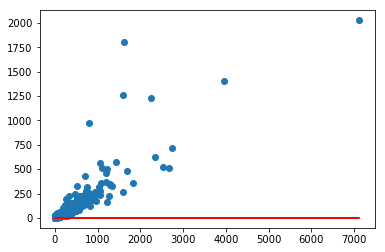

In [40]:
plt.scatter(test[feature_cols], test[feature_cols2])
plt.plot(test[feature_cols], test.assorted_pred_prob, color='red');

In [28]:
print (logreg.predict_proba(1))

[[  1.25945457e-01   1.31498610e-01   9.43939494e-02   6.86142853e-02
    6.51194668e-02   5.33905641e-02   4.10069569e-02   3.35531573e-02
    2.81589045e-02   2.32904433e-02   2.29065721e-02   1.59232555e-02
    1.34176196e-02   1.15752081e-02   1.03365045e-02   1.08397999e-02
    9.57524298e-03   1.00422824e-02   9.51012645e-03   1.15150695e-02
    7.52269018e-03   6.64420960e-03   6.71755013e-03   7.69019001e-03
    5.37941659e-03   4.48211147e-03   5.25877717e-03   6.16420617e-03
    4.84203407e-03   3.47035297e-03   3.73582636e-03   3.59413386e-03
    3.54441924e-03   3.54918432e-03   4.11070940e-03   2.78965563e-03
    2.76821456e-03   1.95080266e-03   2.75784608e-03   2.72416144e-03
    2.08888430e-03   1.75223408e-03   2.24163923e-03   2.03046424e-03
    1.09385005e-03   9.58307131e-04   1.70980066e-03   1.54784525e-03
    1.24442571e-03   1.69779894e-03   1.53695701e-03   9.30075224e-04
    1.06189735e-03   1.97398060e-03   1.83895795e-03   1.21842124e-03
    3.00887964e-04  